# HoloViews provides effortless rich display for complex data

In [1]:
import numpy as np
import holoviews as hv
hv.notebook_extension()

[HoloViews](http://holoviews.org) lets you make your data instantly available for visualization, composition, layout, overlaying, slicing, faceting, animation, sampling, aggregation, normalization, and interactive exploration.  

To understand how such an outlandish claim could be true, let's take a step back and think about the process by which we explore data interactively.  In interpreted languages like Python, basic types and small data structures reveal themselves immediately and unambiguously at the interactive prompt:

In [2]:
f = 2.0
g = ("Squares", f, [x**f for x in [2.5,6,9]])

f

2.0

In [3]:
g

('Squares', 2.0, [6.25, 36.0, 81.0])

Working interactively with small bits of data is thus natural, intuitive, and essentially effortless -- as long as ``f`` is something simple like 2.0, just type its name and you can immediately see what ``f`` is. Small collections of data, like ``g``, are also fully revealed just by typing their names.  However, the representation you get for large collections of numerical data such as arrays is verbose without conveying anything about the data's structure:

In [4]:
bounds = (-4,0,4,8)
samples = 202
xvals = np.linspace(bounds[0],bounds[2],samples)
yvals = np.linspace(bounds[3],bounds[1],samples)
xs,ys = np.meshgrid(xvals, yvals)
s=np.sin(((ys/2)**2+1)*xs)

s

array([[ 0.89792768,  0.97570964,  0.62358519, ..., -0.62358519,
        -0.97570964, -0.89792768],
       [ 0.98393775,  0.66015588,  0.05070831, ..., -0.05070831,
        -0.66015588, -0.98393775],
       [ 0.68838409,  0.09510793, -0.53858356, ...,  0.53858356,
        -0.09510793, -0.68838409],
       ..., 
       [ 0.76092907,  0.7344662 ,  0.70683631, ..., -0.70683631,
        -0.7344662 , -0.76092907],
       [ 0.75783699,  0.73126501,  0.70353385, ..., -0.70353385,
        -0.73126501, -0.75783699],
       [ 0.7568025 ,  0.73019434,  0.70242963, ..., -0.70242963,
        -0.73019434, -0.7568025 ]])

It is nearly impossible to understand the data involved from a representation like this, because only a small portion of the numerical values will fit on your screen, and because our visual systems are built for detecting patterns in images, not lists of numbers. Instead, engineers, scientists, and analysts typically use image-based representations like plots or figures for any large set of numerical data.  Unfortunately, building such plots is typically *not* effortless, requiring many manual steps where a programmer or graphical user applies their understanding of the meaning or interpretation of the data and maps it into a series of plotting commands to make a specific plot.  

What if the relevant aspects of that domain knowledge could be captured directly, making it possible to fully automate the subsequent process of turning the data + domain knowledge into a visible plot?  If that automation could be achieved, we could have a natural, effortlessly visible representation for complex data, just as Python already automatically reveals small data structures consisting of scalar and string data.  

As you will see in the sections below, HoloViews is designed to allow precisely that sort of automation, by letting the user couple arbitrarily complex datasets with a small amount of semantic metadata (hints) about what that data represents.  Supported datatypes include Python data structures and any combination of NumPy or xarray n-dimensional arrays and Pandas or Dask columnar dataframes.  If you then refer to the resulting object at a Jupyter notebook prompt, HoloViews will automatically run suitable plotting commands to render it, with the results revealed interactively using [IPython's rich display support](http://nbviewer.jupyter.org/github/ipython/ipython/blob/2.x/examples/Notebook/Custom%20Display%20Logic.ipynb).  

For instance, after capturing the relevant metadata about the ``s`` array above using the declarative ``Image`` object from HoloViews, the array can be visualized just by referring to it, as easily as if it were a number or a string:

:Image   [x,y]   (z)
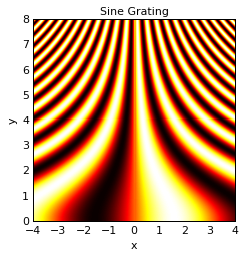

In [5]:
sines = hv.Image(s, bounds=bounds, label="Sine Grating")

sines

You can now see that the `s` array is not just a jumble of numbers, but instead has a very clear structure.  Despite the representation of ``sines`` being a plot, ``sines`` is *not* a plot; the plot is a temporary object created at the instant Jupyter requests a representation for ``sines``. ``sines`` itself is just a simple container for your data and for a small amount of semantic metadata, just as the variable `f` in the code above is not the pixels in the font for the digit 2, it is the floating-point number 2.0.  The metadata in ``sines`` captures the information that makes this plot possible: a human-readable name, an indication that the array values are regularly spaced samples from a continuous 2D surface (an "Image"), and the bounds over which those samples were taken.  None of this metadata can be deduced from the bare ``s`` array, which is why ``s`` cannot have a meaningful representation on its own, but when the metadata is provided as in `sines`, HoloViews can provide a rich and natural representation using its default plotting options, instantly revealing the structure of this data.  

Unlike with a plot, the actual data is still always available from the HoloViews view object:

In [6]:
sines.data

array([[ 0.89792768,  0.97570964,  0.62358519, ..., -0.62358519,
        -0.97570964, -0.89792768],
       [ 0.98393775,  0.66015588,  0.05070831, ..., -0.05070831,
        -0.66015588, -0.98393775],
       [ 0.68838409,  0.09510793, -0.53858356, ...,  0.53858356,
        -0.09510793, -0.68838409],
       ..., 
       [ 0.76092907,  0.7344662 ,  0.70683631, ..., -0.70683631,
        -0.7344662 , -0.76092907],
       [ 0.75783699,  0.73126501,  0.70353385, ..., -0.70353385,
        -0.73126501, -0.75783699],
       [ 0.7568025 ,  0.73019434,  0.70242963, ..., -0.70242963,
        -0.73019434, -0.7568025 ]])

And because ``sines`` *is* your data, not a just a single dead-end plot, you can now use this object in many other contexts without having to type in that metadata again.  For instance, we can take a sample of this 2D array at ``y=1.5``:

:Layout
   .Overlay.Sine_Grating :Overlay
      .Image.Sine_Grating :Image   [x,y]   (z)
      .HLine.I            :HLine   [x,y]
   .Curve.Sine_Grating   :Curve   [x]   (z)
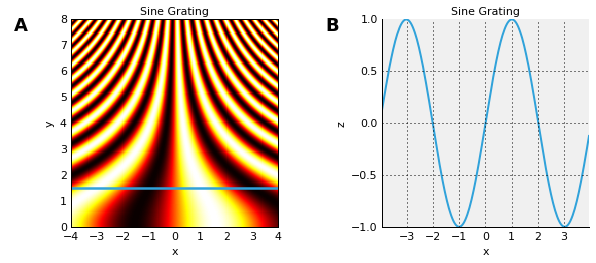

In [7]:
layout = sines*hv.HLine(y=1.5) + sines.sample(y=1.5)

layout

Because HoloViews knows that the ``sines`` object represents a continuous 2D surface, it can automatically deduce that a sample along one axis will be a continuous function of one dimension, i.e., an ``hv.Curve`` object (in **B** above).  Because the bounds were declared, HoloViews can find the corresponding row of the ``s`` matrix that represents ``y=1.5`` to get the data for the curve.  Which row in that matrix corresponds to ``y=1.5`` isn't encoded in the original ``s`` array, but it is easily computed from the declarations in ``sines``.  HoloViews then automatically labels the vertical dimension of the curve as ``z``, because that is the default name for the value dimension in ``sines``.  Other semantic declarations like custom dimension names and units will also propagate automatically where appropriate.

In **A** we have also overlaid a horizontal line on the ``sines`` object using the ``*`` (``Overlay``) operator, and the resulting overlay is then laid out next to the sample curve using the ``+`` (``Layout``) operator.  When typed at the prompt, the combined result is then effortlessly displayed as a figure with plots as subfigures, but it is still just data.  The composite ``layout`` object reflects the relationships that these data items have to one another, allowing them to be grouped together, just as the small tuple of data ``g`` above is a composite object that expresses a relationship between that set of Python literals.

The metadata in ``sines`` makes it simple to explore the properties of this data interactively:

:Layout
   .HoloMap.Sine_Grating.I  :HoloMap   [y]
      :Overlay
         .Image.Sine_Grating :Image   [x,y]   (z)
         .HLine.I            :HLine   [x,y]
   .HoloMap.Sine_Grating.II :HoloMap   [y]
      :Curve   [x]   (z)
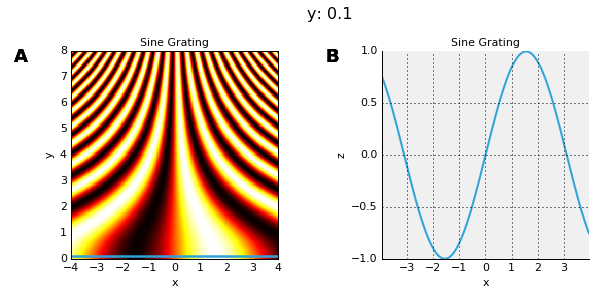
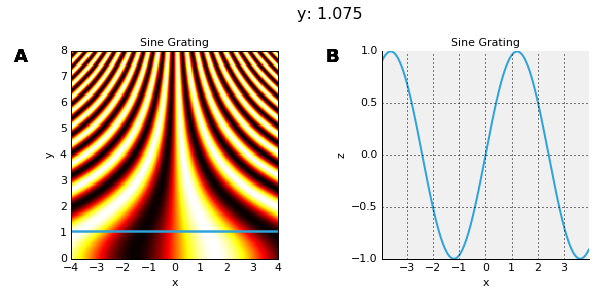
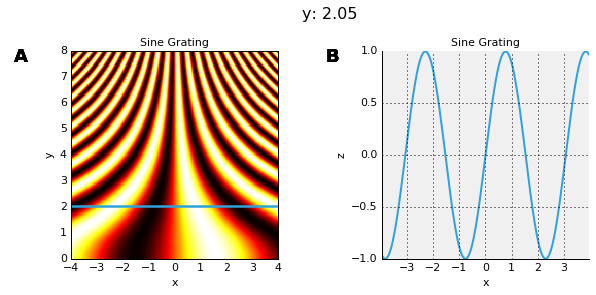
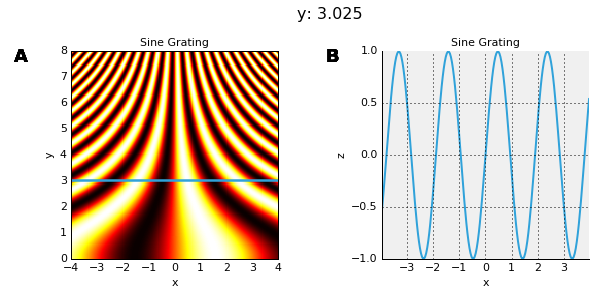
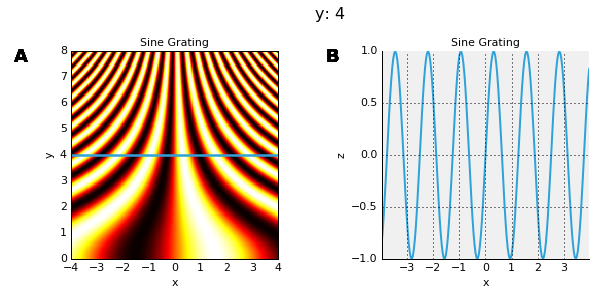
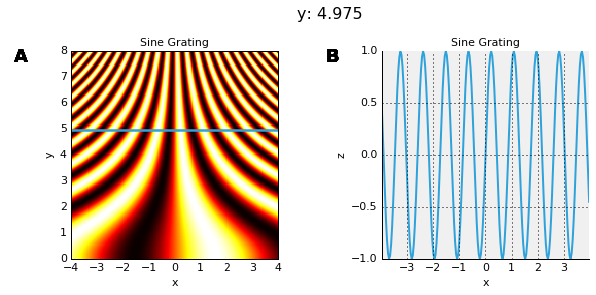
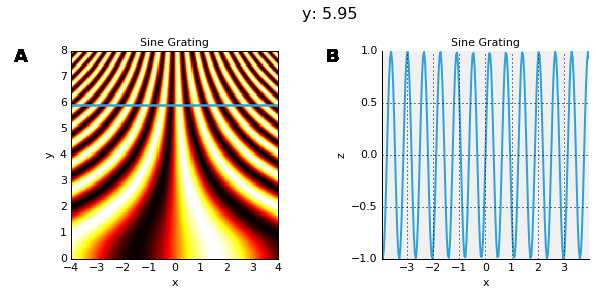
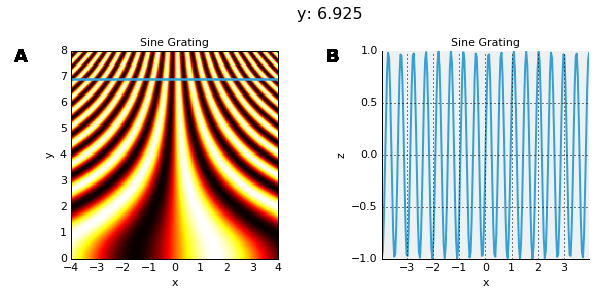
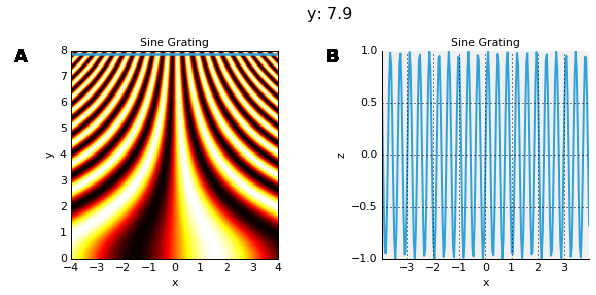

In [8]:
ys = np.linspace(0.1, 7.9, 9)
sine_lines  = hv.HoloMap({y: (sines * hv.HLine(y=y)) for y in ys}, kdims=['y'])
sine_curves = hv.HoloMap({y:  sines.sample(y=y)      for y in ys}, kdims=['y'])
l = sine_lines + sine_curves

l

Here we are using data structures called ``HoloMap``s to store visualizable data indexed along some dimension(s) (``y`` in this case), which we then lay out in the usual way using `+`.  By default, a plot containing one or more ``HoloMap``s will display with sliders to choose values along those dimension(s) for display. We could instead facet along that dimension, i.e., lay out a subset of the data spatially:

:NdLayout   [y]
   :Overlay
      .Image.Sine_Grating :Image   [x,y]   (z)
      .HLine.I            :HLine   [x,y]
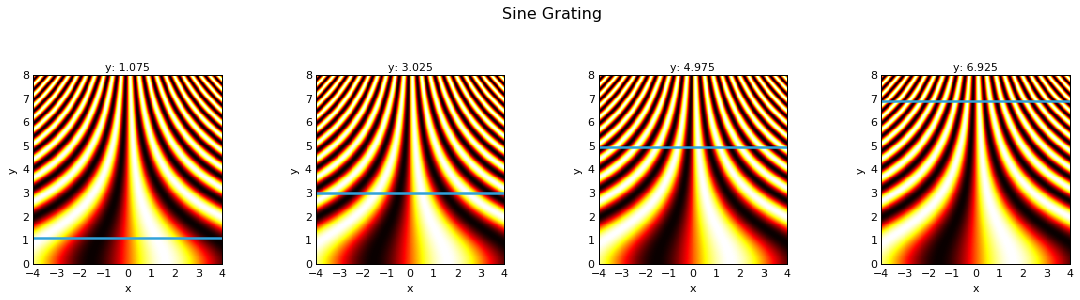

In [9]:
l.HoloMap.Sine_Grating.I[1::2].layout()

:NdLayout   [y]
   :Curve   [x]   (z)
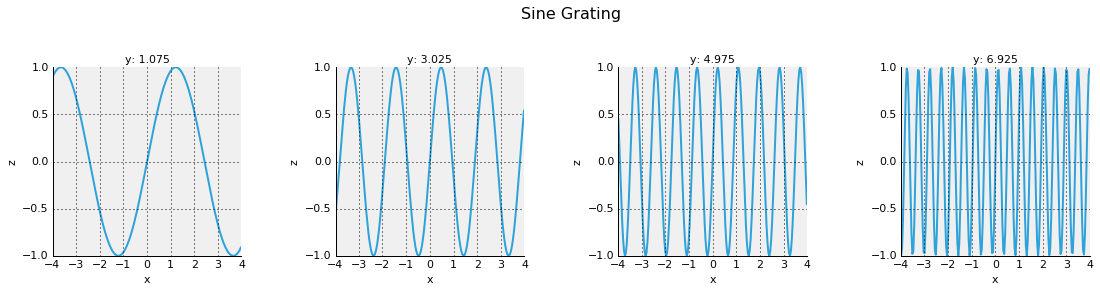

In [10]:
l.HoloMap.Sine_Grating.II[1::2].layout()

Here we are using HoloView's hierarchical multidimensional indexing to access certain parts of this composite data structure:

In [11]:
print(l)

:Layout
   .HoloMap.Sine_Grating.I  :HoloMap   [y]
      :Overlay
         .Image.Sine_Grating :Image   [x,y]   (z)
         .HLine.I            :HLine   [x,y]
   .HoloMap.Sine_Grating.II :HoloMap   [y]
      :Curve   [x]   (z)


Even these deeply nested objects still support indexing into them to access the full original raw data, whether it is Numpy arrays, as here, or Pandas or xarray data structures:

In [12]:
l.HoloMap.Sine_Grating.I[0.1].Image.Sine_Grating.data

array([[ 0.89792768,  0.97570964,  0.62358519, ..., -0.62358519,
        -0.97570964, -0.89792768],
       [ 0.98393775,  0.66015588,  0.05070831, ..., -0.05070831,
        -0.66015588, -0.98393775],
       [ 0.68838409,  0.09510793, -0.53858356, ...,  0.53858356,
        -0.09510793, -0.68838409],
       ..., 
       [ 0.76092907,  0.7344662 ,  0.70683631, ..., -0.70683631,
        -0.7344662 , -0.76092907],
       [ 0.75783699,  0.73126501,  0.70353385, ..., -0.70353385,
        -0.73126501, -0.75783699],
       [ 0.7568025 ,  0.73019434,  0.70242963, ..., -0.70242963,
        -0.73019434, -0.7568025 ]])

Hopefully it is clear that even though HoloViews can be used to make beautiful plots, it is *not* a plotting library.  So how does it actually make the plots?

Behind the scenes, HoloViews will use the excellent lower-level Matplotlib or Bokeh packages to render the images or make an interactive web page. Rather than trying to replace these plotting libraries, HoloViews is a set of tools for working with complex datasets, annotating your data with just enough metadata to make it instantly visualizable. Of course, all the real work is done by the underlying plotting libraries, with HoloViews plotting backends making it possible for you to avoid worrying about all those details in day-to-day work.

The key point is that unlike what you get when working with plotting libraries directly, the plots above are just the *representation* of your data, with a backend-specific figure object and eventual rendering as pixels or HTML created only at the instant when your data needs to be displayed.  The declarative HoloViews view objects wrapping your data are what you would keep, preserve, and modify over time, not the disposable and discardable visible plot.  No one would curate the specific pixels representing 2.0 above, because they know they can always effortlessly regenerate them when needed, and just storing the raw data alone isn't sufficient either, because it doesn't capture enough of the domain knowledge to be interpretable directly.  If instead of using HoloViews you had built a plot directly using the underlying plotting program, then each time you wanted to do the above operations (sampling, slicing, faceting, animating, etc.), you would need to recapitulate all of the semantic metadata into the options for this new plot, which is time consuming, error prone, and would generate large amounts of domain-specific code that you would then need to maintain.

Of course, the default settings used above are sufficient to generate *a* plot, but they may not generate precisely the plot you might want.  In that case, you can give hints to the underlying plotting libraries about how you want to display this data, without complicating your actual data objects:

:Layout
   .Image.Sine_Grating :Image   [x,y]   (z)
   .Curve.Low          :Curve   [x]   (z)
   .Curve.High         :Curve   [x]   (z)
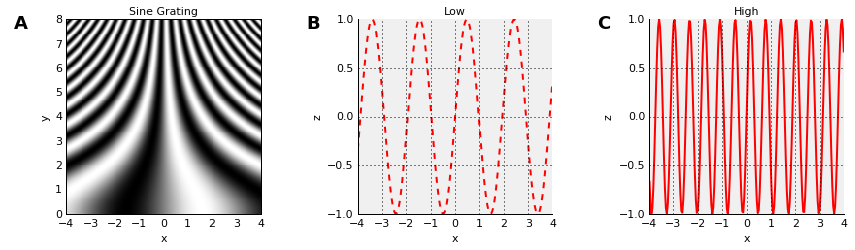

In [13]:
%%opts Image (cmap='gray') Curve (color='red') Curve.Low (linestyle='dashed')

sines + sines.sample(y=3).relabel("Low") + sines.sample(y=6).relabel("High")

Such options can be specified per type, per label, per group, per cell, per notebook, and/or per user account, so there should be a way to express plotting preferences without having to complicate the data itself.  Here they are expressed using a special concise IPython syntax, but [options](http://holoviews.org/Tutorials/Options.html) can also be specified using (somewhat more verbose) Python syntax if preferred.

Hopefully now you can see how HoloViews fits into a science, engineering, data-analysis, or data-science workflow: it helps you collect your data and capture what you know about its semantic properties at a high level, doing it once per type of data rather than again every time you need a different type of plot.  HoloViews then aims to keep you working at that high (semantic) level as much as possible, while also giving you access to the low-level details of your data and its visual representation when you need them. 

[topographica.org](http://topographica.org) shows a wide range of more complex examples that all focus on making it easy and natural to work with the data by capturing the meaningful domain-specific aspects and then automating the resulting plotting and display.  In this way, HoloViews makes it as natural to work with even extremely complicated data as Python does for simple literals!

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

# How it works

If you want to use HoloViews interactively at the Jupyter prompt, all you need to know is that if you refer to a HoloViews object (which we call a "view") at the Jupyter prompt, you'll get a plot, in precisely the same way that if you put something evaluating to 2 at such a prompt you'll see the character "2".  But if you're the sort of person who really wants to know how all that actually works, e.g. if you want to use HoloViews outside of Jupyter, read on.

### Rendering Python scalars

First, let's think about what happens if you type `x` at a Python prompt, having previously done `x=2`, and you see some pixel pattern that you can read as "2".  Your computer starts with some information:

- **data**: the bit pattern 00000010
- **metadata**: the fact that the data is an integer and not a float or an ASCII character
- **display-options**: the numerical base for printing (decimal, binary, hex, etc.), number of digits, whether to use a leading zero, etc., and other aspects of coming up with a string representation for a number
- **rendering_options**: your terminal or browser's default fonts, colors, etc., which are used to turn strings into pixels

Here your actual data is just a tiny chunk of memory, which isn't interpretable without the associated metadata (semantic information) that declares what it is, and even then isn't displayable without the associated option settings (even if never made explicitly) that determine how you want to see it.

Apart from this information, you also need some code:
- **make_obj()**: Construct a Python object holding the data and metadata (i.e., the Python integer 2, not just the bare bit pattern for 2)
- **make_str()**: Use the resulting obj and the str-options to create a string representation for the obj, which in Python is orchestrated by the integer ``__str__`` method.  
- **render()**: Using code in your terminal program, OS, or web browser for taking a string and some rendering_options, turn it into visible pixels.

So the whole sequence of steps from constructing a Python scalar to seeing the result at the Python prompt will end up evaluating code like:

``
renderer(make_str(make_obj(data,metadata), display_options), rendering_options)
``

Then voil&agrave;! you can observe that `x` is 2.  Observing the value is thus effortless for you, but the computer had to go through all of these steps to make that be so.


### Rendering HoloViews objects

Almost precisely the same series of steps happens for HoloViews objects.  For the sine grating example above, you start with some information:

- **data**: the array of floating-point values sampled from the sine function
- **metadata**: the fact that the data is sampled from a continuous function, the text label for the data ("Sine Grating"), the names of each dimension ("x","y"), etc.
- **plot_options**: whether to add a title, legend, etc. -- settings controlling how HoloViews builds a plot
- **style_options**: line color, line style, background color, etc. -- settings passed on to the Bokeh or Matplotlib backend
- **rendering_options**: HTML figure size, PNG height and width, etc. -- settings controlling how your final plot is rendered from a Bokeh or Matplotlib figure once created

Compared to displaying Python strings, here we have two separate types of display options, depending on whether HoloViews is the one consuming the options (`plot_options`), or whether they are passed down unchanged to the underlying Bokeh or Matplotlib backend (`style_options`).  As before, you also need some code:

- **make_obj()**: Construct a HoloViews object (`hv.Curve()`, `hv.Image()`, etc.) to store the data and metadata  
- **make_plot()**: given a HoloViews object and the plot-options, construct a plotting object using a particular plotting backend (Matplotlib, Bokeh, etc.) and pass the style-options to that backend for its use
- **render()**: given a plot constructed by one of the backends, along with the renderer-options, render that plot as something immediately viewable in a given context (i.e., a PNG, HTML code, etc.)

So, the corresponding sequence of operations from data+metadata to a plot visible at the Jupyter prompt is:

``
render(make_plot(make_obj(data,metadata), style_options, plot_options), rendering_options)
``

Here's a concrete example of each of the above bits of data and code, for a sine curve plot in HoloViews:

In [14]:
# Declare the data and how to interpret it
data = np.sin(np.arange(5000)/500.0)
metadata = {'kdims': ['x'], 'vdims': ['y']}
make_obj = hv.Curve

# Make aesthetic decisions (styling, optional plot elements)
# (these can be done per plot, or per general type of plot)
plot_options = {'show_grid':False}
style_options = {'color':"green"}

# Make technology decisions about how the plot will be generated
# (these are generally done per session, not per type of plot)
make_plot = hv.plotting.mpl.CurvePlot
render = hv.Store.renderers['matplotlib'].save
rendering_options={'basename':"sine"}

# Render the final image
plot = make_plot(make_obj(data, **metadata), style=hv.Options(**style_options), **plot_options)
plot.initialize_plot()
render(plot, **rendering_options)

<!-- #render(plot(view(data, **metadata), **plot_options), **rendering_options) -->

This particular set of options results in the file "sine.png" on disk, which can be viewed as:

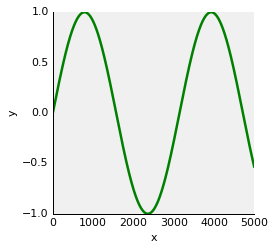

In [15]:
import IPython.display
IPython.display.Image(filename='sine.png')

If you use Jupyter, the only code bit you need to worry about is `make_obj`, where you attach the metadata to the data. The rest of the code should all be invoked for you at the right times automatically. If you don't use Jupyter, e.g. in an automated workflow, you can invoke each part separately if you like, as shown above, but even then you can usually let the renderer's `save` method look everything up as needed (as shown [here](https://github.com/ioam/holoviews-contrib/blob/master/scripts/matplotlib_export.py)).

However you invoke these commands, each of these categories of data, metadata, and options will be available to you for controlling what you want to see and how you would like to see it, while keeping your semantic information (data, metadata) clearly separated from the incidental display details.

This approach is very different from how the API for a traditional plotting program like gnuplot or matplotlib works.  Such programs freely mix all of the above categories of information into calls at different levels, making it impossible to support the sort of "rich display" of your actual data that is possible with HoloViews, and the corresponding operations and transformations.  Using the matplotlib API directly, as soon as some plot can be viewed, the actual data is no longer recoverable from the representation, having been turned into plotting glyphs or pixels.

Thus traditional plotting APIs are "one way" paths from data to a representation, requiring the user to start over from scratch with the original data (assuming they still have it) to construct any other representation, just as there is no automated way to go from the pixel pattern representing "2" to the underlying integer value.  Instead of having to build a long series of dead-end visualizations, HoloViews lets you work with complex data as easily as you can with Python scalars, letting you make real progress much more quickly by focusing your efforts on capturing your domain knowledge rather than laboriously building each specific plot.